In [1]:
import numpy as np
import pandas as pd
storage_options = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
# GDP = pd.read_csv("StateGDP.csv")
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
codes = pd.read_csv("taxitemcodesanddescriptions.csv", header = [0], index_col = [0])
# list(GDP[["LineCode","Description"]].set_index(["LineCode", "Description"]).index.unique())

In [2]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_df.T# state_abbrev

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Abbr,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY


In [3]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [4]:
data_codes  = {state: f"{state}POP" for state in state_dict.values()}
state_gdp_codes = {state: f"{state}NGSP" for state in state_dict.values()}

# Select start and end dates
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fred_data = {"Population": gather_data(data_codes = data_codes, start = start, end = end, freq = "A"),
             "GDP": gather_data(data_codes = state_gdp_codes, start = start, end = end, freq = "A")}


In [5]:
panels = {}
for key, fred_df in fred_data.items():
    print(key)
    panels[key] = fred_df.reset_index()
    panels[key]["DATE"] = panels[key]["DATE"].astype(str).str[:4].astype(int)
    panels[key] = panels[key].melt(
        id_vars = ["DATE"], 
        var_name = "State", 
        value_name = key).set_index(["State", "DATE"]).round(2)

    
panels[key]


Population
GDP


GDP
State DATE          
AL    1997  105381.4
      1998  110838.8
      1999  116514.3
      2000  120522.6
      2001  123534.5
...              ...
WY    2019   39971.4
      2020   36675.5
      2021   42176.2
      2022   49080.6
      2023   50171.6

[1350 rows x 1 columns]

In [6]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
for name, efwdata in list(efw.items())[1:]:
        cols = list(efwdata.keys())
        col0 = cols[0]
        efwdata = efwdata.dropna(subset = cols[-1]).rename(columns = {col0:"State"})
        panel = efwdata[efwdata["State"].isin(state_names)]
        for i in range(len(years)):
                try:
                        panel = panel[["State"] + years[i:]]
                        break
                except:
                        continue
        panel["State"] = panel["State"].apply(lambda x:state_dict[x])
        panel = panel.melt(id_vars=["State"], 
                var_name="Year", 
                value_name=name).set_index(["State", "Year"]).round(2)
        panels[name] = panel.copy()
panels["EFNA"] = panels['Overall-scores(allgovs)'].rename(columns = {'Overall-scores(allgovs)':"EFNA"}).copy()
panel_keys = list(panels.keys())
for k in panel_keys:
        panels[k].rename(columns = {k: k.replace("-allg","").strip()}, inplace = True)
        if k != k.replace("-allg","").strip():
                cols0 = k.replace("-allg","").strip()
                panels["EFNA " + cols0] = panels[k].rename(columns = {cols0:"EFNA " + cols0 }).copy()
                del panels[k] 
panels.keys()

dict_keys(['Population', 'GDP', 'Overall-scores(allgovs)', 'Overall-ranks(allgovs)', 'EFNA', 'EFNA 1A', 'EFNA 1B', 'EFNA 1C', 'EFNA 1D', 'EFNA 2A', 'EFNA 2B', 'EFNA 2Bi', 'EFNA 2Bii', 'EFNA 2C', 'EFNA 2D', 'EFNA 3A', 'EFNA 3Ai', 'EFNA 3Aii', 'EFNA 3Aiii', 'EFNA 3Aiv', 'EFNA 3B', 'EFNA 3C', 'EFNA 4', 'EFNA 5', 'EFNA 6'])

In [7]:
expand_digits = {"Population": 3, "GDP": 6}#, "EFW":0}
for key in panels.keys():
    if key not in ["Population", "GDP"]:
        expand_digits[key] = 0
panel = panels["Population"].copy()
for key, df in panels.items():
    panel[key] = df[key].mul(10 ** expand_digits[key])
panel["GDP Per Capita"] = panel["GDP"].div(panel["Population"])
for key in ("GDP", "Population", "GDP Per Capita"):
    panel[f"Log {key}"] = np.log(panel[key])
    panel[f"{key} % Growth"] = panel[f"Log {key}"].groupby("State").diff()
panel.loc["ND"]

,Population,GDP,Overall-scores(allgovs),Overall-ranks(allgovs),EFNA,EFNA 1A,EFNA 1B,EFNA 1C,EFNA 1D,EFNA 2A,...,EFNA 4,EFNA 5,EFNA 6,GDP Per Capita,Log GDP,GDP % Growth,Log Population,Population % Growth,Log GDP Per Capita,GDP Per Capita % Growth
DATE,,,,,,,,,,,,,,,,,,,,,
1985,676980.0,NaN,8.08,38.0,8.08,8.58,7.58,3.43,8.78,7.82,...,8.64,9.34,9.26,NaN,NaN,NaN,13.425397,NaN,NaN,NaN
1986,669510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.414301,-0.011096,NaN,NaN
1987,661140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.401721,-0.012580,NaN,NaN
1988,655330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.392894,-0.008827,NaN,NaN
1989,646350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.379096,-0.013798,NaN,NaN
1990,637360.0,NaN,8.16,52.0,8.16,8.57,8.29,3.38,8.08,2.88,...,8.46,9.67,9.08,NaN,NaN,NaN,13.365090,-0.014007,NaN,NaN
1991,634200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.360120,-0.004970,NaN,NaN
1992,635430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.362057,0.001938,NaN,NaN
1993,637230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.364886,0.002829,NaN,NaN


In [8]:
# Maybe labels from 97 keys were entered by an intern who was filling in for the usual data person who was on leave,
fix_97_keys = pd.DataFrame({'VI':"VA", "AR":"AZ", 
                            'AR    .1':"AR", "LS":"LA",
                            "GE":"GA"}, 
                           index = ["Correction"]).T
fix_97_keys

,Correction
VI,VA
AR,AZ
AR .1,AR
LS,LA
GE,GA


In [9]:
# urls = ["https://www2.census.gov/govs/statetax/" +str(i)[-2:] + "staxcd.txt" for i in range(92,122)]
tax_dfs = {}
for year in range(1992,2022):
    key = str(year)[-2:] 
    try:    
        url = "https://www2.census.gov/govs/statetax/" +key + "staxcd.txt"
        tax_dfs[year] = pd.read_csv(url, index_col = [0])
        tax_dfs[year].rename(columns = {col:col.strip().replace("-State","") for col in tax_dfs[year].columns}, inplace = True)
        tax_dfs[year].rename(columns = {name:state_df.loc[name].values[0] for name in state_names}, inplace = True)
        if key == "97":
            tax_dfs[year].rename(columns = {
                wrong_key:fix_97_keys.loc[wrong_key].values[0] for wrong_key in fix_97_keys.index}, 
                                inplace = True)
        # adjust units from 1000s to millions
        tax_dfs[year] = tax_dfs[year][state_abbrev].div(1000)
#         tax_dfs[key].rename(columns = {col:col.strip() for col in tax_dfs[key].columns}, inplace = True)
    except:
        print("failed to download " + url)
tax_dfs.keys()

failed to download https://www2.census.gov/govs/statetax/16staxcd.txt
failed to download https://www2.census.gov/govs/statetax/17staxcd.txt
failed to download https://www2.census.gov/govs/statetax/18staxcd.txt
failed to download https://www2.census.gov/govs/statetax/19staxcd.txt
failed to download https://www2.census.gov/govs/statetax/20staxcd.txt
failed to download https://www2.census.gov/govs/statetax/21staxcd.txt


dict_keys([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [10]:
code_dfs = {}
for code in codes.index:
    code_dfs[code] = {}
    for year in tax_dfs.keys():
        code_dfs[code][year] = tax_dfs[year].loc[code] 
    code_dfs[code] = pd.DataFrame(code_dfs[code])

In [11]:
code_dfs["TotalTax"] = {}
for key, df in tax_dfs.items():
    print(df.index)
    code_dfs["TotalTax"][key] = df.iloc[1:].sum()
# code_dfs["TotalTax"]

Index(['T01', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T19',
       'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T27', 'T28', 'T29', 'T40',
       'T41', 'T50', 'T51', 'T53', 'T99'],
      dtype='object')
Index(['POP', 'I99', 'T01', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15',
       'T16', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T27', 'T28',
       'T29', 'T40', 'T41', 'T50', 'T51', 'T53', 'T99'],
      dtype='object')
Index(['POP', 'I99', 'T01', 'T02', 'T04', 'T05', 'T06', 'T07', 'T09', 'T10',
       'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T19', 'T20', 'T21', 'T22',
       'T23', 'T24', 'T25', 'T27', 'T28', 'T29', 'T40', 'T41', 'T50', 'T51',
       'T53', 'T99'],
      dtype='object')
Index([  nan, 'POP', 'I99', 'T01', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14',
       'T15', 'T16', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T27',
       'T28', 'T29', 'T40', 'T41', 'T50', 'T51', 'T53', 'T99'],
      dtype='object', name='ITE')
Index([  nan, 'POP', 

In [12]:
tax_names = list(code_dfs.keys())
for code, df in code_dfs.items():
    code_dfs[code] = pd.DataFrame(df)
    code_dfs[code].index.name = "State"
    code_dfs[code] = code_dfs[code].reset_index().melt(id_vars=["State"], 
        var_name="Year", 
        value_name=code).set_index(["State", "Year"])
    #     panel.loc[panel.index.isin(code_dfs[code].index),code] = code_dfs[code]
# panel = panel[code].copy()
for code, df in code_dfs.items():
    panel[code] = code_dfs[code]
    
#     panel[code + "/GDP"] = panel[code].div(panel["GDP"]).mul(100)

In [13]:
panel["TotalTax/GDP"] = panel["TotalTax"].div(panel["GDP"])
panel.dropna()

Population           GDP  Overall-scores(allgovs)  \
State DATE                                                      
AL    2000   4452170.0  1.205226e+11                     8.53   
      2001   4467630.0  1.235345e+11                     8.39   
      2002   4480090.0  1.283809e+11                     8.40   
      2003   4503490.0  1.352126e+11                     8.42   
      2004   4530730.0  1.483791e+11                     8.48   
...                ...           ...                      ...   
WY    2011    567490.0  3.961510e+10                     7.98   
      2012    576660.0  3.867930e+10                     8.08   
      2013    582620.0  3.936560e+10                     8.01   
      2014    583160.0  4.057390e+10                     8.09   
      2015    586390.0  3.862480e+10                     8.09   

            Overall-ranks(allgovs)  EFNA  EFNA 1A  EFNA 1B  EFNA 1C  EFNA 1D  \
State DATE                                                                     
AL    2000                    12.0  8.53     8.53     9.24     4.21    10.00   
      2001                    11.0  8.39     8.36     9.11     3.83     8.82   
      2002                     7.0  8.40     8.19     8.99     3.67     9.08   
      2003                     7.0  8.42     8.14     9.02     3.71     9.10   
      2004                     7.0  8.48     8.09     9.05     3.82     9.78   
...                            ...   ...      ...      ...      ...      ...   
WY    2011                    19.0  7.98     8.28     8.56     1.90     7.61   
      2012                    16.0  8.08     8.52     8.79     2.24     8.05   
      2013                    21.0  8.01     8.46     8.87     1.76     8.49   
      2014                    11.0  8.09     8.84     9.02     1.90     9.47   
      2015                    22.0  8.09     8.61     8.92     1.86     9.50   

            EFNA 2A  ...      T28    T29       T40      T41     T50     T51  \
State DATE           ...                                                      
AL    2000     6.79  ...  129.486  0.058  2071.433  243.099  66.763  26.487   
      2001     7.14  ...  117.483  0.068  2437.640  201.533  47.261  29.383   
      2002     7.29  ...   98.943  0.013  2030.694  322.636  82.970  34.625   
      2003     7.57  ...   98.814  0.006  2035.538  242.411  33.549  45.839   
      2004     7.76  ...  107.177  0.007  2243.537  292.051  29.467  45.080   
...             ...  ...      ...    ...       ...      ...     ...     ...   
WY    2011     8.54  ...   22.848  0.000     0.000    0.000   0.000   0.000   
      2012     8.55  ...   23.822  0.000     0.000    0.000   0.038   0.000   
      2013     7.19  ...   25.298  0.000     0.000    0.000   0.000   0.000   
      2014     7.79  ...   26.172  0.000     0.000    0.000   0.000   0.000   
      2015     7.58  ...   26.326  0.000     0.000    0.000   0.000   0.000   

                 T53    T99  TotalTax  TotalTax/GDP  
State DATE                                           
AL    2000    80.738  0.000  6438.438  5.342100e-08  
      2001   118.310  0.000  6747.707  5.462204e-08  
      2002    65.667  0.000  6509.765  5.070665e-08  
      2003   104.386  0.000  6416.351  4.745379e-08  
      2004   113.646  0.000  7018.242  4.729940e-08  
...              ...    ...       ...           ...  
WY    2011  1044.150  5.270  1987.353  5.016655e-08  
      2012   968.525  5.446  1987.894  5.139426e-08  
      2013   867.933  4.594  1854.155  4.710090e-08  
      2014   883.025  6.417  1963.291  4.838803e-08  
      2015   883.913  5.223  2037.754  5.275766e-08  

[800 rows x 59 columns]

In [14]:
panel.reset_index().rename(columns = {"DATE": "Year"}).to_csv("EFNAGDPTaxes.csv")

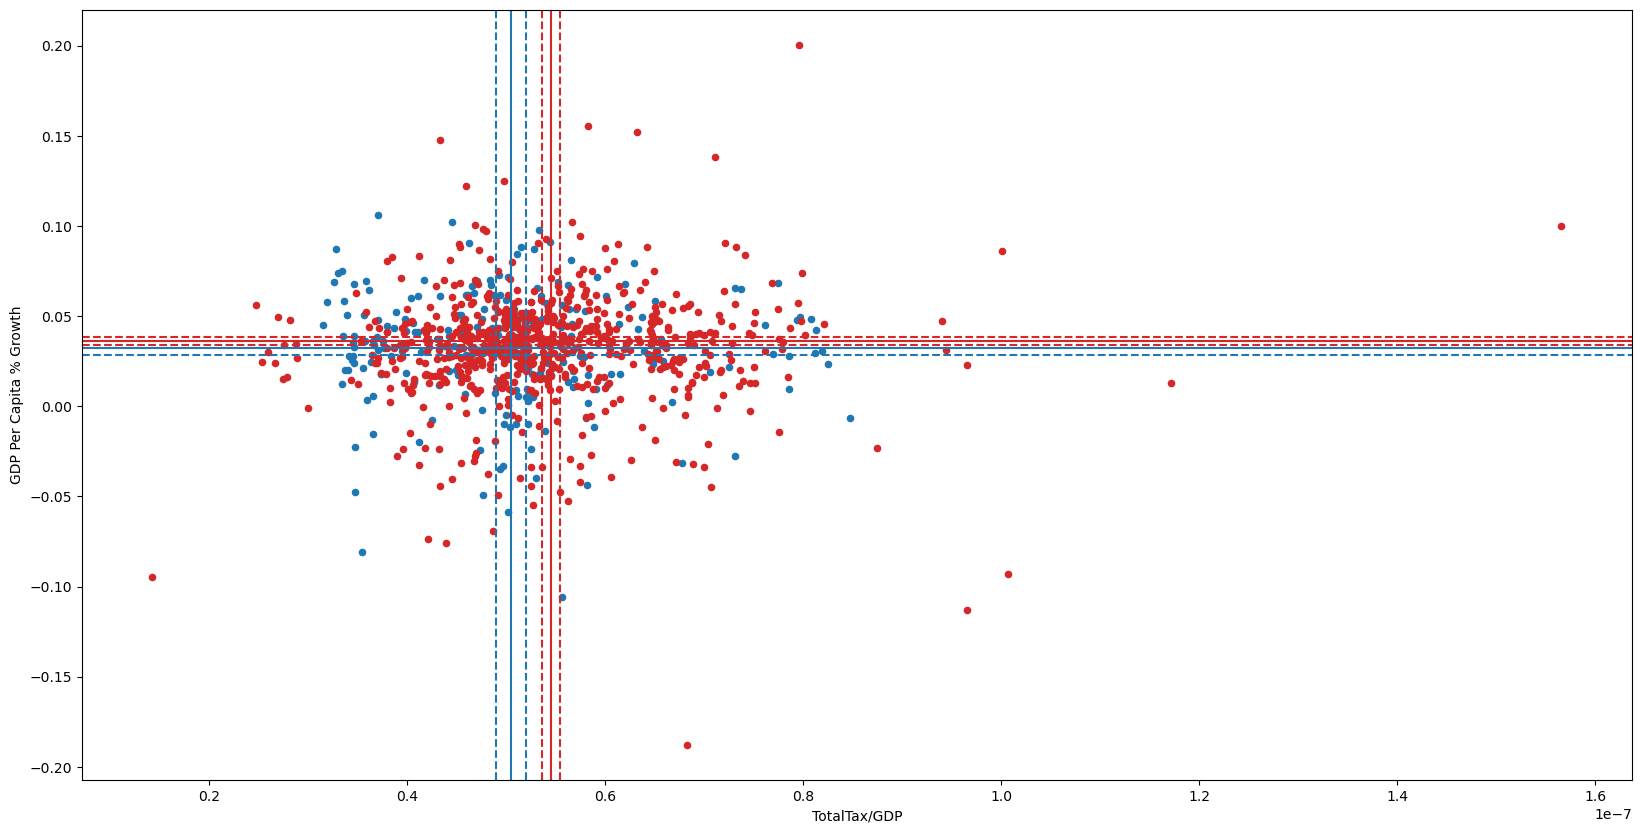

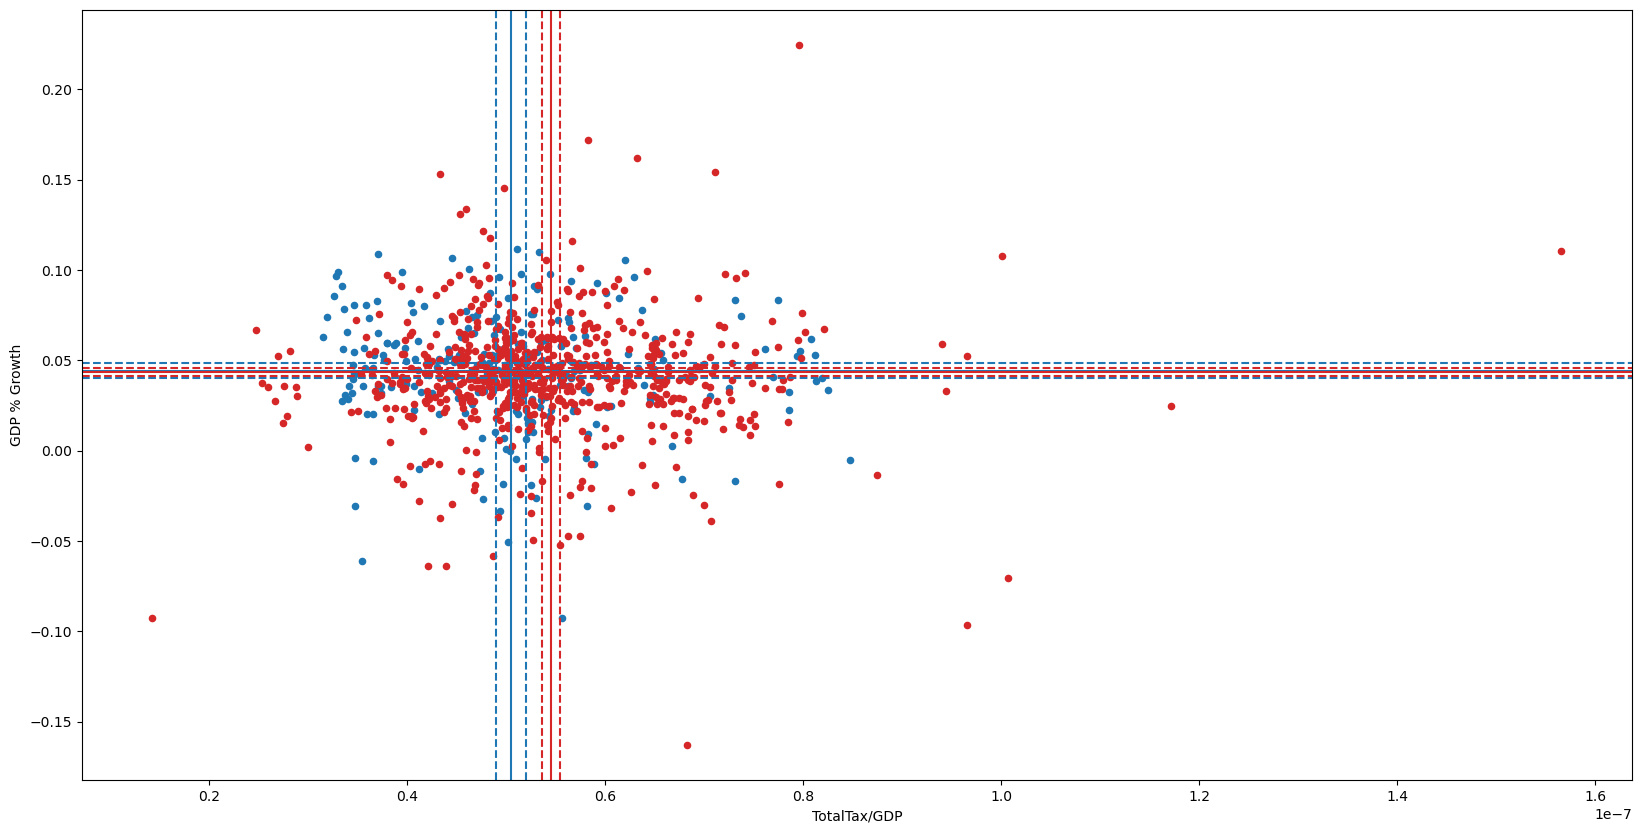

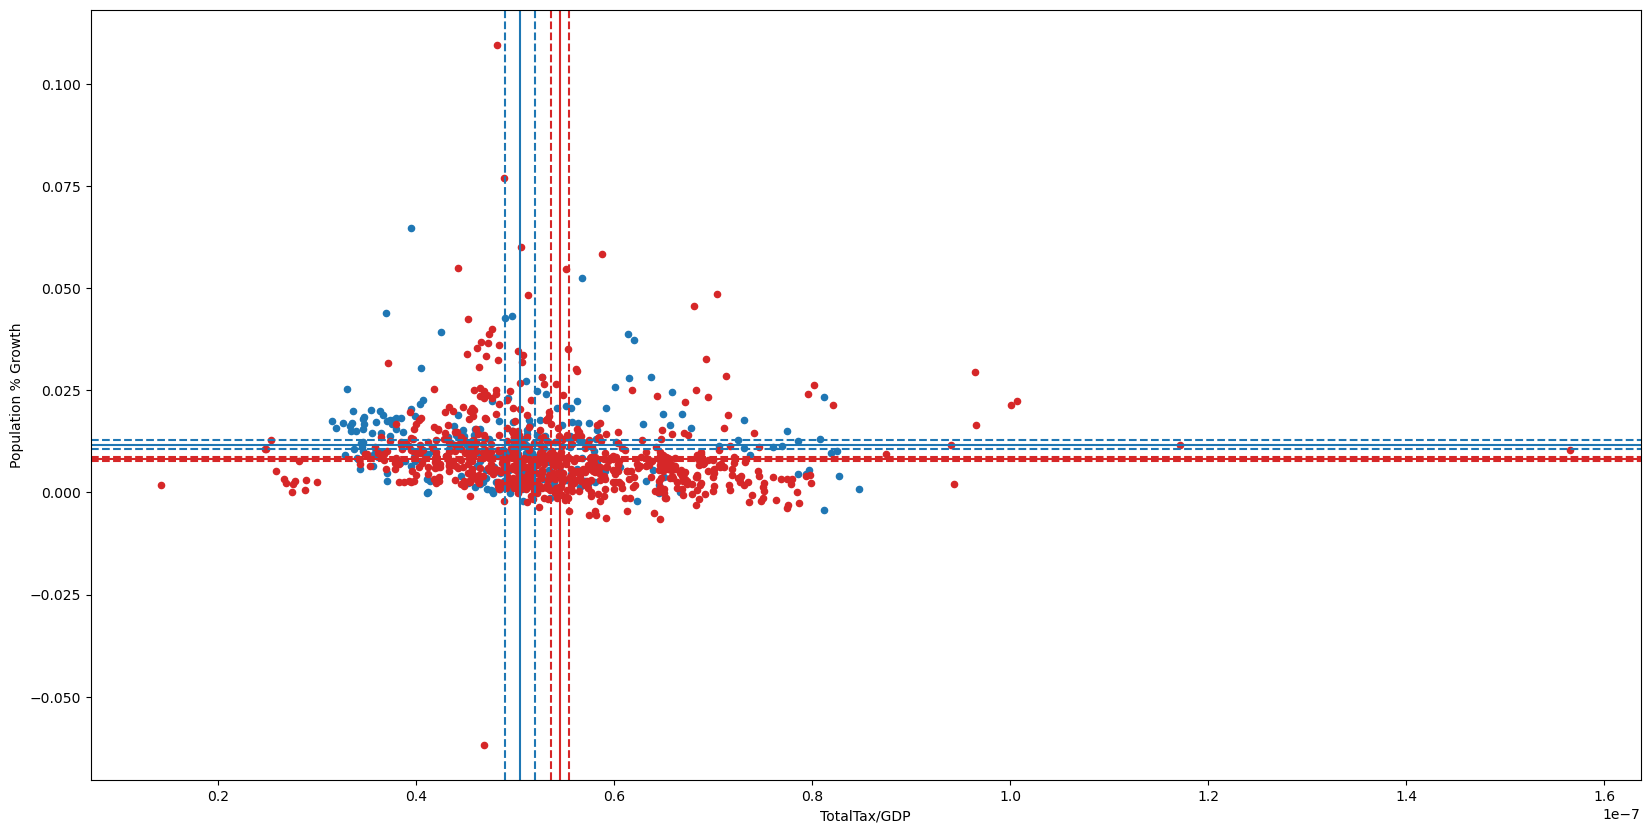

In [15]:
import matplotlib.pyplot as plt
no_prop_tax = panel[panel["T01"]==0]
prop_tax = panel[panel["T01"]!=0]

for key in ("GDP Per Capita","GDP", "Population"):
    fig, ax = plt.subplots(figsize = (20,10))
    key = key + " % Growth"
    colors = ["C0", "C3"]
    for i, df in enumerate((no_prop_tax, prop_tax)):
        color = colors[i]
        df.plot.scatter(x = "TotalTax/GDP", y = key, color = color, ax = ax)
        
        
        mean_key = df.mean()[key]
        se_key = df.sem()[key]
        mean_tax_gdp = df.mean()["TotalTax/GDP"]
        se_tax_gdp = df.sem()["TotalTax/GDP"]
        
        
        ax.axhline(mean_key, color = color)
        ax.axhline(mean_key + se_key * 2, color = color, ls = "--")
        ax.axhline(mean_key - se_key * 2, color = color, ls = "--")
        
        ax.axvline(mean_tax_gdp, color = color)
        ax.axvline(mean_tax_gdp + se_tax_gdp * 2, color = color, ls = "--")        
        ax.axvline(mean_tax_gdp - se_tax_gdp * 2, color = color, ls = "--")
        

In [16]:
pct_gdp_panel = panel.apply(lambda x: x / panel["GDP"])
pct_gdp_panel.dropna()

Population  GDP  Overall-scores(allgovs)  Overall-ranks(allgovs)  \
State DATE                                                                     
AL    2000    0.000037  1.0             7.077511e-11            9.956639e-11   
      2001    0.000036  1.0             6.791625e-11            8.904395e-11   
      2002    0.000035  1.0             6.543029e-11            5.452524e-11   
      2003    0.000033  1.0             6.227230e-11            5.177032e-11   
      2004    0.000031  1.0             5.715091e-11            4.717646e-11   
...                ...  ...                      ...                     ...   
WY    2011    0.000014  1.0             2.014383e-10            4.796151e-10   
      2012    0.000015  1.0             2.088973e-10            4.136580e-10   
      2013    0.000015  1.0             2.034771e-10            5.334607e-10   
      2014    0.000014  1.0             1.993893e-10            2.711102e-10   
      2015    0.000015  1.0             2.094509e-10            5.695822e-10   

                    EFNA       EFNA 1A       EFNA 1B       EFNA 1C  \
State DATE                                                           
AL    2000  7.077511e-11  7.077511e-11  7.666612e-11  3.493121e-11   
      2001  6.791625e-11  6.767340e-11  7.374458e-11  3.100348e-11   
      2002  6.543029e-11  6.379454e-11  7.002599e-11  2.858681e-11   
      2003  6.227230e-11  6.020149e-11  6.670976e-11  2.743827e-11   
      2004  5.715091e-11  5.452250e-11  6.099242e-11  2.574487e-11   
...                  ...           ...           ...           ...   
WY    2011  2.014383e-10  2.090112e-10  2.160792e-10  4.796151e-11   
      2012  2.088973e-10  2.202729e-10  2.272533e-10  5.791211e-11   
      2013  2.034771e-10  2.149084e-10  2.253236e-10  4.470909e-11   
      2014  1.993893e-10  2.178741e-10  2.223104e-10  4.682813e-11   
      2015  2.094509e-10  2.229138e-10  2.309397e-10  4.815559e-11   

                 EFNA 1D       EFNA 2A  ...           T28           T29  \
State DATE                              ...                               
AL    2000  8.297199e-11  5.633798e-11  ...  1.074371e-09  4.812375e-13   
      2001  7.139706e-11  5.779762e-11  ...  9.510137e-10  5.504535e-13   
      2002  7.072703e-11  5.678415e-11  ...  7.706988e-10  1.012612e-13   
      2003  6.730142e-11  5.598591e-11  ...  7.308047e-10  4.437456e-14   
      2004  6.591225e-11  5.229847e-11  ...  7.223187e-10  4.717646e-14   
...                  ...           ...  ...           ...           ...   
WY    2011  1.920985e-10  2.155744e-10  ...  5.767498e-10  0.000000e+00   
      2012  2.081217e-10  2.210485e-10  ...  6.158850e-10  0.000000e+00   
      2013  2.156705e-10  1.826468e-10  ...  6.426423e-10  0.000000e+00   
      2014  2.334013e-10  1.919953e-10  ...  6.450452e-10  0.000000e+00   
      2015  2.459560e-10  1.962470e-10  ...  6.815828e-10  0.000000e+00   

                     T40           T41           T50           T51  \
State DATE                                                           
AL    2000  1.718709e-08  2.017041e-09  5.539459e-10  2.197679e-10   
      2001  1.973246e-08  1.631390e-09  3.825733e-10  2.378526e-10   
      2002  1.581773e-08  2.513115e-09  6.462799e-10  2.697052e-10   
      2003  1.505435e-08  1.792814e-09  2.481204e-10  3.390143e-10   
      2004  1.512030e-08  1.968276e-09  1.985927e-10  3.038164e-10   
...                  ...           ...           ...           ...   
WY    2011  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
      2012  0.000000e+00  0.000000e+00  9.824376e-13  0.000000e+00   
      2013  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
      2014  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
      2015  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                     T53           T99      TotalTax  TotalTax/GDP  
State DATE                                                          
AL    2000  6.698993e-10  0.000000e

In [17]:
# fig, ax = plt.subplots(figsize = (20,10))
# plot_df[tax_names[:-1]].plot.area(
#     legend = True, 
#     ax = ax)
